<a href="https://colab.research.google.com/github/aebongbing/ESAA/blob/main/20231030_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("/content/train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (6713, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0.0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0.0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0.0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6713 entries, 0 to 6712
Columns: 371 entries, ID to TARGET
dtypes: float64(93), int64(278)
memory usage: 19.0 MB


In [4]:
# target 속성의 값의 분포
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt=cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0.0    6436
1.0     276
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
# 피처의 값 분포 확인
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,...,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6.712000e+03,6712.000000
mean,6724.261433,-593.104722,33.425890,69.941713,73.781744,127.328075,6.300058,12.805558,0.201102,0.375391,...,5.031570,1.892753,5.330252,4.144921,16.453109,2.949221,25.561850,19.347689,1.177982e+05,0.041120
std,3894.741635,24404.807760,12.980533,773.491862,337.217901,602.813032,146.846320,265.749746,11.721773,18.113723,...,257.513923,98.111555,269.492747,204.051056,686.265970,231.283147,933.000265,714.284195,1.838929e+05,0.198583
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048518e+04,0.000000
25%,3342.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.789251e+04,0.000000
50%,6731.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.077064e+05,0.000000
75%,10051.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.205899e+05,0.000000
max,13481.000000,229.000000,102.000000,39000.000000,7904.220000,15182.460000,7904.220000,11073.570000,750.000000,960.000000,...,15265.950000,6643.290000,15458.220000,11959.170000,44990.490000,18928.590000,47617.080000,36988.200000,9.055272e+06,1.000000


In [6]:
# var3 : 다른 값에 비해  -999999은 편차가 심하므로 값이 가장 많은 2로 변환
# ID : 단순 식별자이므로 드롭

cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(6713, 369)


In [7]:
# 학습 데이터 세트와 테스트 데이터 세트 분리
# 비대칭 데이터 세트이므로 Target 값 분포도가 비슷한지 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 Shape:(5370, 369), 테스트 세트 Shape:(1343, 369)
 학습 세트 레이블 값 분포 비율
0.0    0.959955
1.0    0.040045
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0.0    0.954579
1.0    0.045421
Name: TARGET, dtype: float64


In [10]:
print("Unique values in y:", np.unique(y_train))

Unique values in y: [ 0.  1. nan]


In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.86423	validation_1-auc:0.78660
[1]	validation_0-auc:0.87816	validation_1-auc:0.80568
[2]	validation_0-auc:0.88798	validation_1-auc:0.80176
[3]	validation_0-auc:0.90392	validation_1-auc:0.81078
[4]	validation_0-auc:0.91270	validation_1-auc:0.80587
[5]	validation_0-auc:0.91759	validation_1-auc:0.78644
[6]	validation_0-auc:0.92393	validation_1-auc:0.80591
[7]	validation_0-auc:0.92870	validation_1-auc:0.81457
[8]	validation_0-auc:0.93368	validation_1-auc:0.81384
[9]	validation_0-auc:0.93783	validation_1-auc:0.81902
[10]	validation_0-auc:0.93975	validation_1-auc:0.82107
[11]	validation_0-auc:0.94298	validation_1-auc:0.82095
[12]	validation_0-auc:0.94773	validation_1-auc:0.81476
[13]	validation_0-auc:0.95252	validation_1-auc:0.80939
[14]	validation_0-auc:0.95450	validation_1-auc:0.80891
[15]	validation_0-auc:0.95476	validation_1-auc:0.80901
[16]	validation_0-auc:0.95700	validation_1-auc:0.80884
[17]	validation_0-auc:0.95787	validation_1-auc:0.80821
[18]	validation_0-au

In [13]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] , 'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83225	validation_1-auc:0.77790
[1]	validation_0-auc:0.83973	validation_1-auc:0.73044
[2]	validation_0-auc:0.83766	validation_1-auc:0.74719
[3]	validation_0-auc:0.83894	validation_1-auc:0.74609
[4]	validation_0-auc:0.86071	validation_1-auc:0.77561
[5]	validation_0-auc:0.86791	validation_1-auc:0.78641
[6]	validation_0-auc:0.87447	validation_1-auc:0.79367
[7]	validation_0-auc:0.87759	validation_1-auc:0.78151
[8]	validation_0-auc:0.88191	validation_1-auc:0.78300
[9]	validation_0-auc:0.88464	validation_1-auc:0.78528
[10]	validation_0-auc:0.88878	validation_1-auc:0.77860
[11]	validation_0-auc:0.89389	validation_1-auc:0.78936
[12]	validation_0-auc:0.89934	validation_1-auc:0.79127
[13]	validation_0-auc:0.89997	validation_1-auc:0.78554
[14]	validation_0-auc:0.90135	validation_1-auc:0.78418
[15]	validation_0-auc:0.90259	validation_1-auc:0.78848
[16]	validation_0-auc:0.90260	validation_1-auc:0.78743
[17]	validation_0-auc:0.90261	validation_1-auc:0.78883
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.84668	validation_1-auc:0.80630
[1]	validation_0-auc:0.85384	validation_1-auc:0.78107
[2]	validation_0-auc:0.84502	validation_1-auc:0.77108
[3]	validation_0-auc:0.85773	validation_1-auc:0.76722
[4]	validation_0-auc:0.87522	validation_1-auc:0.79119
[5]	validation_0-auc:0.88362	validation_1-auc:0.79716
[6]	validation_0-auc:0.88576	validation_1-auc:0.80093
[7]	validation_0-auc:0.88744	validation_1-auc:0.80391
[8]	validation_0-auc:0.89072	validation_1-auc:0.81091
[9]	validation_0-auc:0.89399	validation_1-auc:0.80936
[10]	validation_0-auc:0.89687	validation_1-auc:0.80725
[11]	validation_0-auc:0.90064	validation_1-auc:0.81062
[12]	validation_0-auc:0.90165	validation_1-auc:0.81213
[13]	validation_0-auc:0.90305	validation_1-auc:0.81178
[14]	validation_0-auc:0.90408	validation_1-auc:0.80710
[15]	validation_0-auc:0.90605	validation_1-auc:0.80460
[16]	validation_0-auc:0.90713	validation_1-auc:0.80497
[17]	validation_0-auc:0.90657	validation_1-auc:0.80559
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83047	validation_1-auc:0.77073
[1]	validation_0-auc:0.83322	validation_1-auc:0.75887
[2]	validation_0-auc:0.82181	validation_1-auc:0.73991
[3]	validation_0-auc:0.81790	validation_1-auc:0.73591
[4]	validation_0-auc:0.85724	validation_1-auc:0.78416
[5]	validation_0-auc:0.87141	validation_1-auc:0.79206
[6]	validation_0-auc:0.87523	validation_1-auc:0.79462
[7]	validation_0-auc:0.87464	validation_1-auc:0.78724
[8]	validation_0-auc:0.88021	validation_1-auc:0.78726
[9]	validation_0-auc:0.88617	validation_1-auc:0.78455
[10]	validation_0-auc:0.88797	validation_1-auc:0.79155
[11]	validation_0-auc:0.89046	validation_1-auc:0.79458
[12]	validation_0-auc:0.89271	validation_1-auc:0.79479
[13]	validation_0-auc:0.89431	validation_1-auc:0.79485
[14]	validation_0-auc:0.89767	validation_1-auc:0.79949
[15]	validation_0-auc:0.89735	validation_1-auc:0.79720
[16]	validation_0-auc:0.90014	validation_1-auc:0.80286
[17]	validation_0-auc:0.90103	validation_1-auc:0.80669
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82022	validation_1-auc:0.78826
[1]	validation_0-auc:0.82800	validation_1-auc:0.75631
[2]	validation_0-auc:0.83456	validation_1-auc:0.74526
[3]	validation_0-auc:0.83053	validation_1-auc:0.75254
[4]	validation_0-auc:0.85626	validation_1-auc:0.79100
[5]	validation_0-auc:0.86507	validation_1-auc:0.80079
[6]	validation_0-auc:0.86663	validation_1-auc:0.80075
[7]	validation_0-auc:0.86714	validation_1-auc:0.80171
[8]	validation_0-auc:0.87047	validation_1-auc:0.79819
[9]	validation_0-auc:0.87914	validation_1-auc:0.79867
[10]	validation_0-auc:0.88181	validation_1-auc:0.79735
[11]	validation_0-auc:0.88753	validation_1-auc:0.79749
[12]	validation_0-auc:0.88924	validation_1-auc:0.79405
[13]	validation_0-auc:0.88962	validation_1-auc:0.79288
[14]	validation_0-auc:0.89214	validation_1-auc:0.79749
[15]	validation_0-auc:0.89449	validation_1-auc:0.80032
[16]	validation_0-auc:0.89774	validation_1-auc:0.79440
[17]	validation_0-auc:0.89727	validation_1-auc:0.79549
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83894	validation_1-auc:0.79984
[1]	validation_0-auc:0.84380	validation_1-auc:0.76699
[2]	validation_0-auc:0.83869	validation_1-auc:0.79320
[3]	validation_0-auc:0.83345	validation_1-auc:0.77978
[4]	validation_0-auc:0.85510	validation_1-auc:0.80653
[5]	validation_0-auc:0.86196	validation_1-auc:0.82387
[6]	validation_0-auc:0.87022	validation_1-auc:0.82727
[7]	validation_0-auc:0.87373	validation_1-auc:0.82256
[8]	validation_0-auc:0.87550	validation_1-auc:0.81822
[9]	validation_0-auc:0.87844	validation_1-auc:0.80724
[10]	validation_0-auc:0.88002	validation_1-auc:0.80205
[11]	validation_0-auc:0.88316	validation_1-auc:0.80577
[12]	validation_0-auc:0.88646	validation_1-auc:0.80703
[13]	validation_0-auc:0.88618	validation_1-auc:0.80708
[14]	validation_0-auc:0.88963	validation_1-auc:0.80938
[15]	validation_0-auc:0.89041	validation_1-auc:0.80706
[16]	validation_0-auc:0.89219	validation_1-auc:0.80798
[17]	validation_0-auc:0.89448	validation_1-auc:0.80930
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83329	validation_1-auc:0.77217
[1]	validation_0-auc:0.83617	validation_1-auc:0.76345
[2]	validation_0-auc:0.82574	validation_1-auc:0.74826
[3]	validation_0-auc:0.82505	validation_1-auc:0.73552
[4]	validation_0-auc:0.85096	validation_1-auc:0.78632
[5]	validation_0-auc:0.86012	validation_1-auc:0.80604
[6]	validation_0-auc:0.87092	validation_1-auc:0.80889
[7]	validation_0-auc:0.87094	validation_1-auc:0.79847
[8]	validation_0-auc:0.87417	validation_1-auc:0.79976
[9]	validation_0-auc:0.87777	validation_1-auc:0.79592
[10]	validation_0-auc:0.88246	validation_1-auc:0.80720
[11]	validation_0-auc:0.88571	validation_1-auc:0.80681
[12]	validation_0-auc:0.88552	validation_1-auc:0.81025
[13]	validation_0-auc:0.88582	validation_1-auc:0.81176
[14]	validation_0-auc:0.88734	validation_1-auc:0.80805
[15]	validation_0-auc:0.88693	validation_1-auc:0.80403
[16]	validation_0-auc:0.88798	validation_1-auc:0.80293
[17]	validation_0-auc:0.88935	validation_1-auc:0.80394
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.85633	validation_1-auc:0.80827
[1]	validation_0-auc:0.85949	validation_1-auc:0.73786
[2]	validation_0-auc:0.85603	validation_1-auc:0.74317
[3]	validation_0-auc:0.85674	validation_1-auc:0.73412
[4]	validation_0-auc:0.87390	validation_1-auc:0.76332
[5]	validation_0-auc:0.87960	validation_1-auc:0.77678
[6]	validation_0-auc:0.88609	validation_1-auc:0.77134
[7]	validation_0-auc:0.88972	validation_1-auc:0.76310
[8]	validation_0-auc:0.89199	validation_1-auc:0.76627
[9]	validation_0-auc:0.89385	validation_1-auc:0.75687
[10]	validation_0-auc:0.89635	validation_1-auc:0.75372
[11]	validation_0-auc:0.90156	validation_1-auc:0.75753
[12]	validation_0-auc:0.90302	validation_1-auc:0.75973
[13]	validation_0-auc:0.90498	validation_1-auc:0.76110
[14]	validation_0-auc:0.90774	validation_1-auc:0.76327
[15]	validation_0-auc:0.90964	validation_1-auc:0.77109
[16]	validation_0-auc:0.91390	validation_1-auc:0.77610
[17]	validation_0-auc:0.91446	validation_1-auc:0.77097
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.86041	validation_1-auc:0.79375
[1]	validation_0-auc:0.86333	validation_1-auc:0.74403
[2]	validation_0-auc:0.85605	validation_1-auc:0.73561
[3]	validation_0-auc:0.87001	validation_1-auc:0.72659
[4]	validation_0-auc:0.88816	validation_1-auc:0.77215
[5]	validation_0-auc:0.89782	validation_1-auc:0.78562
[6]	validation_0-auc:0.90080	validation_1-auc:0.79728
[7]	validation_0-auc:0.90271	validation_1-auc:0.78932
[8]	validation_0-auc:0.90875	validation_1-auc:0.79869
[9]	validation_0-auc:0.91145	validation_1-auc:0.79619
[10]	validation_0-auc:0.91607	validation_1-auc:0.79804
[11]	validation_0-auc:0.91835	validation_1-auc:0.80448
[12]	validation_0-auc:0.92050	validation_1-auc:0.80940
[13]	validation_0-auc:0.92217	validation_1-auc:0.80873
[14]	validation_0-auc:0.92371	validation_1-auc:0.80474
[15]	validation_0-auc:0.92348	validation_1-auc:0.80542
[16]	validation_0-auc:0.92515	validation_1-auc:0.81292
[17]	validation_0-auc:0.92395	validation_1-auc:0.81213
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.85361	validation_1-auc:0.78502
[1]	validation_0-auc:0.85939	validation_1-auc:0.77104
[2]	validation_0-auc:0.84868	validation_1-auc:0.76513
[3]	validation_0-auc:0.84950	validation_1-auc:0.75619
[4]	validation_0-auc:0.87528	validation_1-auc:0.80502
[5]	validation_0-auc:0.88562	validation_1-auc:0.80782
[6]	validation_0-auc:0.88954	validation_1-auc:0.81514
[7]	validation_0-auc:0.89408	validation_1-auc:0.80591
[8]	validation_0-auc:0.89596	validation_1-auc:0.80786
[9]	validation_0-auc:0.89835	validation_1-auc:0.80541
[10]	validation_0-auc:0.89793	validation_1-auc:0.80563
[11]	validation_0-auc:0.89968	validation_1-auc:0.80850
[12]	validation_0-auc:0.90366	validation_1-auc:0.80851
[13]	validation_0-auc:0.90510	validation_1-auc:0.80435
[14]	validation_0-auc:0.90660	validation_1-auc:0.81160
[15]	validation_0-auc:0.90679	validation_1-auc:0.81112
[16]	validation_0-auc:0.90901	validation_1-auc:0.80956
[17]	validation_0-auc:0.91054	validation_1-auc:0.80485
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83173	validation_1-auc:0.79329
[1]	validation_0-auc:0.84543	validation_1-auc:0.76010
[2]	validation_0-auc:0.84831	validation_1-auc:0.75258
[3]	validation_0-auc:0.84345	validation_1-auc:0.75052
[4]	validation_0-auc:0.86146	validation_1-auc:0.78478
[5]	validation_0-auc:0.86994	validation_1-auc:0.79182
[6]	validation_0-auc:0.87734	validation_1-auc:0.79270
[7]	validation_0-auc:0.88071	validation_1-auc:0.79927
[8]	validation_0-auc:0.88276	validation_1-auc:0.79722
[9]	validation_0-auc:0.89159	validation_1-auc:0.79481
[10]	validation_0-auc:0.89479	validation_1-auc:0.79540
[11]	validation_0-auc:0.89630	validation_1-auc:0.79878
[12]	validation_0-auc:0.89773	validation_1-auc:0.79320
[13]	validation_0-auc:0.89846	validation_1-auc:0.79190
[14]	validation_0-auc:0.90065	validation_1-auc:0.80041
[15]	validation_0-auc:0.89993	validation_1-auc:0.79902
[16]	validation_0-auc:0.90163	validation_1-auc:0.79914
[17]	validation_0-auc:0.90261	validation_1-auc:0.79792
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.84630	validation_1-auc:0.78940
[1]	validation_0-auc:0.85101	validation_1-auc:0.76995
[2]	validation_0-auc:0.85316	validation_1-auc:0.74605
[3]	validation_0-auc:0.85990	validation_1-auc:0.75324
[4]	validation_0-auc:0.87685	validation_1-auc:0.78752
[5]	validation_0-auc:0.88192	validation_1-auc:0.80046
[6]	validation_0-auc:0.88793	validation_1-auc:0.81180
[7]	validation_0-auc:0.89354	validation_1-auc:0.81240
[8]	validation_0-auc:0.89511	validation_1-auc:0.81250
[9]	validation_0-auc:0.89705	validation_1-auc:0.80510
[10]	validation_0-auc:0.89952	validation_1-auc:0.80541
[11]	validation_0-auc:0.90076	validation_1-auc:0.80447
[12]	validation_0-auc:0.90465	validation_1-auc:0.80636
[13]	validation_0-auc:0.90600	validation_1-auc:0.81073
[14]	validation_0-auc:0.90614	validation_1-auc:0.80811
[15]	validation_0-auc:0.90872	validation_1-auc:0.80696
[16]	validation_0-auc:0.90963	validation_1-auc:0.80625
[17]	validation_0-auc:0.90915	validation_1-auc:0.80731
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.84739	validation_1-auc:0.77410
[1]	validation_0-auc:0.84967	validation_1-auc:0.72900
[2]	validation_0-auc:0.84640	validation_1-auc:0.71728
[3]	validation_0-auc:0.84207	validation_1-auc:0.71811
[4]	validation_0-auc:0.86508	validation_1-auc:0.76852
[5]	validation_0-auc:0.87353	validation_1-auc:0.79704
[6]	validation_0-auc:0.88392	validation_1-auc:0.79481
[7]	validation_0-auc:0.88446	validation_1-auc:0.78992
[8]	validation_0-auc:0.88768	validation_1-auc:0.79449
[9]	validation_0-auc:0.88834	validation_1-auc:0.78952
[10]	validation_0-auc:0.89035	validation_1-auc:0.80319
[11]	validation_0-auc:0.89299	validation_1-auc:0.80511
[12]	validation_0-auc:0.89254	validation_1-auc:0.80827
[13]	validation_0-auc:0.89200	validation_1-auc:0.80325
[14]	validation_0-auc:0.89362	validation_1-auc:0.80827
[15]	validation_0-auc:0.89419	validation_1-auc:0.80552
[16]	validation_0-auc:0.89548	validation_1-auc:0.80198
[17]	validation_0-auc:0.89782	validation_1-auc:0.80486
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83514	validation_1-auc:0.79071
[1]	validation_0-auc:0.84676	validation_1-auc:0.79488
[2]	validation_0-auc:0.85745	validation_1-auc:0.78178
[3]	validation_0-auc:0.85888	validation_1-auc:0.78365
[4]	validation_0-auc:0.86153	validation_1-auc:0.76494
[5]	validation_0-auc:0.86732	validation_1-auc:0.76456
[6]	validation_0-auc:0.87382	validation_1-auc:0.76792
[7]	validation_0-auc:0.87950	validation_1-auc:0.78526
[8]	validation_0-auc:0.88361	validation_1-auc:0.79204
[9]	validation_0-auc:0.88702	validation_1-auc:0.79288
[10]	validation_0-auc:0.89125	validation_1-auc:0.78972
[11]	validation_0-auc:0.89508	validation_1-auc:0.78773
[12]	validation_0-auc:0.89802	validation_1-auc:0.78510
[13]	validation_0-auc:0.89787	validation_1-auc:0.78597
[14]	validation_0-auc:0.89933	validation_1-auc:0.78620
[15]	validation_0-auc:0.90117	validation_1-auc:0.78857
[16]	validation_0-auc:0.90171	validation_1-auc:0.79365
[17]	validation_0-auc:0.90223	validation_1-auc:0.79122
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83452	validation_1-auc:0.76502
[1]	validation_0-auc:0.85902	validation_1-auc:0.79898
[2]	validation_0-auc:0.87505	validation_1-auc:0.81900
[3]	validation_0-auc:0.87630	validation_1-auc:0.83470
[4]	validation_0-auc:0.88297	validation_1-auc:0.83353
[5]	validation_0-auc:0.88532	validation_1-auc:0.83334
[6]	validation_0-auc:0.88926	validation_1-auc:0.83165
[7]	validation_0-auc:0.89340	validation_1-auc:0.82952
[8]	validation_0-auc:0.89728	validation_1-auc:0.82359
[9]	validation_0-auc:0.89894	validation_1-auc:0.81896
[10]	validation_0-auc:0.90101	validation_1-auc:0.81945
[11]	validation_0-auc:0.90363	validation_1-auc:0.82635
[12]	validation_0-auc:0.90403	validation_1-auc:0.82105
[13]	validation_0-auc:0.90441	validation_1-auc:0.82046
[14]	validation_0-auc:0.90706	validation_1-auc:0.81990
[15]	validation_0-auc:0.90943	validation_1-auc:0.81364
[16]	validation_0-auc:0.90958	validation_1-auc:0.81206
[17]	validation_0-auc:0.91032	validation_1-auc:0.81262
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81527	validation_1-auc:0.77214
[1]	validation_0-auc:0.85356	validation_1-auc:0.80003
[2]	validation_0-auc:0.85053	validation_1-auc:0.78130
[3]	validation_0-auc:0.86594	validation_1-auc:0.78912
[4]	validation_0-auc:0.87238	validation_1-auc:0.78676
[5]	validation_0-auc:0.87876	validation_1-auc:0.79595
[6]	validation_0-auc:0.88434	validation_1-auc:0.80110
[7]	validation_0-auc:0.89076	validation_1-auc:0.80387
[8]	validation_0-auc:0.89320	validation_1-auc:0.80657
[9]	validation_0-auc:0.89277	validation_1-auc:0.81612
[10]	validation_0-auc:0.89220	validation_1-auc:0.81178
[11]	validation_0-auc:0.89351	validation_1-auc:0.80244
[12]	validation_0-auc:0.89550	validation_1-auc:0.80822
[13]	validation_0-auc:0.89634	validation_1-auc:0.81017
[14]	validation_0-auc:0.89714	validation_1-auc:0.81031
[15]	validation_0-auc:0.89770	validation_1-auc:0.80742
[16]	validation_0-auc:0.89825	validation_1-auc:0.80456
[17]	validation_0-auc:0.89910	validation_1-auc:0.80251
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82304	validation_1-auc:0.79743
[1]	validation_0-auc:0.83909	validation_1-auc:0.80692
[2]	validation_0-auc:0.85345	validation_1-auc:0.78119
[3]	validation_0-auc:0.85629	validation_1-auc:0.79381
[4]	validation_0-auc:0.86153	validation_1-auc:0.79298
[5]	validation_0-auc:0.87272	validation_1-auc:0.79364
[6]	validation_0-auc:0.87352	validation_1-auc:0.79354
[7]	validation_0-auc:0.87527	validation_1-auc:0.79829
[8]	validation_0-auc:0.87911	validation_1-auc:0.79611
[9]	validation_0-auc:0.88192	validation_1-auc:0.79898
[10]	validation_0-auc:0.88692	validation_1-auc:0.80728
[11]	validation_0-auc:0.88932	validation_1-auc:0.80434
[12]	validation_0-auc:0.89145	validation_1-auc:0.81001
[13]	validation_0-auc:0.89096	validation_1-auc:0.80208
[14]	validation_0-auc:0.89375	validation_1-auc:0.79976
[15]	validation_0-auc:0.89490	validation_1-auc:0.79708
[16]	validation_0-auc:0.89559	validation_1-auc:0.79457
[17]	validation_0-auc:0.89626	validation_1-auc:0.79099
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83262	validation_1-auc:0.77831
[1]	validation_0-auc:0.84979	validation_1-auc:0.79925
[2]	validation_0-auc:0.86911	validation_1-auc:0.81043
[3]	validation_0-auc:0.87128	validation_1-auc:0.82450
[4]	validation_0-auc:0.87592	validation_1-auc:0.82780
[5]	validation_0-auc:0.87671	validation_1-auc:0.83210
[6]	validation_0-auc:0.87932	validation_1-auc:0.82997
[7]	validation_0-auc:0.88166	validation_1-auc:0.83328
[8]	validation_0-auc:0.88437	validation_1-auc:0.82527
[9]	validation_0-auc:0.88844	validation_1-auc:0.82991
[10]	validation_0-auc:0.89031	validation_1-auc:0.82300
[11]	validation_0-auc:0.89419	validation_1-auc:0.81643
[12]	validation_0-auc:0.89398	validation_1-auc:0.81859
[13]	validation_0-auc:0.89568	validation_1-auc:0.81486
[14]	validation_0-auc:0.89790	validation_1-auc:0.80815
[15]	validation_0-auc:0.89804	validation_1-auc:0.80657
[16]	validation_0-auc:0.89809	validation_1-auc:0.80919
[17]	validation_0-auc:0.89888	validation_1-auc:0.80661
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81854	validation_1-auc:0.77286
[1]	validation_0-auc:0.85025	validation_1-auc:0.80065
[2]	validation_0-auc:0.85292	validation_1-auc:0.77802
[3]	validation_0-auc:0.86237	validation_1-auc:0.78889
[4]	validation_0-auc:0.86851	validation_1-auc:0.78808
[5]	validation_0-auc:0.87140	validation_1-auc:0.79996
[6]	validation_0-auc:0.87113	validation_1-auc:0.79767
[7]	validation_0-auc:0.87604	validation_1-auc:0.79909
[8]	validation_0-auc:0.87673	validation_1-auc:0.80522
[9]	validation_0-auc:0.87916	validation_1-auc:0.81141
[10]	validation_0-auc:0.87987	validation_1-auc:0.81073
[11]	validation_0-auc:0.88196	validation_1-auc:0.81009
[12]	validation_0-auc:0.88208	validation_1-auc:0.80773
[13]	validation_0-auc:0.88264	validation_1-auc:0.81115
[14]	validation_0-auc:0.88413	validation_1-auc:0.81089
[15]	validation_0-auc:0.88643	validation_1-auc:0.80468
[16]	validation_0-auc:0.88744	validation_1-auc:0.80139
[17]	validation_0-auc:0.88892	validation_1-auc:0.79970
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.85885	validation_1-auc:0.80580
[1]	validation_0-auc:0.86263	validation_1-auc:0.80247
[2]	validation_0-auc:0.87460	validation_1-auc:0.78407
[3]	validation_0-auc:0.87631	validation_1-auc:0.75921
[4]	validation_0-auc:0.88179	validation_1-auc:0.78069
[5]	validation_0-auc:0.88582	validation_1-auc:0.77588
[6]	validation_0-auc:0.89097	validation_1-auc:0.77672
[7]	validation_0-auc:0.89362	validation_1-auc:0.77861
[8]	validation_0-auc:0.89692	validation_1-auc:0.77521
[9]	validation_0-auc:0.90319	validation_1-auc:0.79387
[10]	validation_0-auc:0.90706	validation_1-auc:0.79591
[11]	validation_0-auc:0.90886	validation_1-auc:0.79297
[12]	validation_0-auc:0.91124	validation_1-auc:0.78818
[13]	validation_0-auc:0.91339	validation_1-auc:0.78508
[14]	validation_0-auc:0.91455	validation_1-auc:0.78780
[15]	validation_0-auc:0.91624	validation_1-auc:0.79077
[16]	validation_0-auc:0.91768	validation_1-auc:0.78900
[17]	validation_0-auc:0.91946	validation_1-auc:0.78522
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.85249	validation_1-auc:0.74474
[1]	validation_0-auc:0.86845	validation_1-auc:0.77485
[2]	validation_0-auc:0.88780	validation_1-auc:0.80555
[3]	validation_0-auc:0.89130	validation_1-auc:0.82435
[4]	validation_0-auc:0.89400	validation_1-auc:0.82406
[5]	validation_0-auc:0.89629	validation_1-auc:0.82910
[6]	validation_0-auc:0.90141	validation_1-auc:0.82800
[7]	validation_0-auc:0.90417	validation_1-auc:0.82819
[8]	validation_0-auc:0.90734	validation_1-auc:0.82208
[9]	validation_0-auc:0.90850	validation_1-auc:0.81465
[10]	validation_0-auc:0.91115	validation_1-auc:0.80981
[11]	validation_0-auc:0.91250	validation_1-auc:0.80928
[12]	validation_0-auc:0.91306	validation_1-auc:0.80414
[13]	validation_0-auc:0.91307	validation_1-auc:0.80241
[14]	validation_0-auc:0.91336	validation_1-auc:0.79952
[15]	validation_0-auc:0.91357	validation_1-auc:0.79785
[16]	validation_0-auc:0.91489	validation_1-auc:0.79977
[17]	validation_0-auc:0.91592	validation_1-auc:0.79942
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83404	validation_1-auc:0.76695
[1]	validation_0-auc:0.86522	validation_1-auc:0.77497
[2]	validation_0-auc:0.86547	validation_1-auc:0.75595
[3]	validation_0-auc:0.87850	validation_1-auc:0.78520
[4]	validation_0-auc:0.88297	validation_1-auc:0.78424
[5]	validation_0-auc:0.88850	validation_1-auc:0.79565
[6]	validation_0-auc:0.89300	validation_1-auc:0.80193
[7]	validation_0-auc:0.89835	validation_1-auc:0.80559
[8]	validation_0-auc:0.89995	validation_1-auc:0.79993
[9]	validation_0-auc:0.90258	validation_1-auc:0.80912
[10]	validation_0-auc:0.90379	validation_1-auc:0.80264
[11]	validation_0-auc:0.90303	validation_1-auc:0.80558
[12]	validation_0-auc:0.90567	validation_1-auc:0.81092
[13]	validation_0-auc:0.90672	validation_1-auc:0.81100
[14]	validation_0-auc:0.90730	validation_1-auc:0.81400
[15]	validation_0-auc:0.90722	validation_1-auc:0.81190
[16]	validation_0-auc:0.90868	validation_1-auc:0.81116
[17]	validation_0-auc:0.91184	validation_1-auc:0.81376
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83811	validation_1-auc:0.80329
[1]	validation_0-auc:0.84867	validation_1-auc:0.79950
[2]	validation_0-auc:0.86420	validation_1-auc:0.77146
[3]	validation_0-auc:0.86579	validation_1-auc:0.80069
[4]	validation_0-auc:0.87067	validation_1-auc:0.81332
[5]	validation_0-auc:0.87914	validation_1-auc:0.80854
[6]	validation_0-auc:0.88038	validation_1-auc:0.80797
[7]	validation_0-auc:0.88484	validation_1-auc:0.79602
[8]	validation_0-auc:0.88624	validation_1-auc:0.79618
[9]	validation_0-auc:0.88931	validation_1-auc:0.80036
[10]	validation_0-auc:0.89024	validation_1-auc:0.79891
[11]	validation_0-auc:0.89323	validation_1-auc:0.79935
[12]	validation_0-auc:0.89343	validation_1-auc:0.79623
[13]	validation_0-auc:0.89772	validation_1-auc:0.79527
[14]	validation_0-auc:0.90095	validation_1-auc:0.79638
[15]	validation_0-auc:0.90330	validation_1-auc:0.79721
[16]	validation_0-auc:0.90615	validation_1-auc:0.79530
[17]	validation_0-auc:0.90754	validation_1-auc:0.79724
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.84509	validation_1-auc:0.77268
[1]	validation_0-auc:0.86147	validation_1-auc:0.79144
[2]	validation_0-auc:0.87353	validation_1-auc:0.78504
[3]	validation_0-auc:0.87965	validation_1-auc:0.79951
[4]	validation_0-auc:0.88256	validation_1-auc:0.81046
[5]	validation_0-auc:0.88395	validation_1-auc:0.82623
[6]	validation_0-auc:0.88496	validation_1-auc:0.82552
[7]	validation_0-auc:0.88991	validation_1-auc:0.82561
[8]	validation_0-auc:0.89220	validation_1-auc:0.82034
[9]	validation_0-auc:0.89420	validation_1-auc:0.82221
[10]	validation_0-auc:0.89372	validation_1-auc:0.82069
[11]	validation_0-auc:0.89698	validation_1-auc:0.82346
[12]	validation_0-auc:0.89969	validation_1-auc:0.82524
[13]	validation_0-auc:0.90185	validation_1-auc:0.81836
[14]	validation_0-auc:0.90214	validation_1-auc:0.81853
[15]	validation_0-auc:0.90269	validation_1-auc:0.81172
[16]	validation_0-auc:0.90329	validation_1-auc:0.81183
[17]	validation_0-auc:0.90434	validation_1-auc:0.80866
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83273	validation_1-auc:0.77218
[1]	validation_0-auc:0.86024	validation_1-auc:0.78149
[2]	validation_0-auc:0.86287	validation_1-auc:0.76792
[3]	validation_0-auc:0.86947	validation_1-auc:0.78716
[4]	validation_0-auc:0.87444	validation_1-auc:0.78589
[5]	validation_0-auc:0.88018	validation_1-auc:0.79811
[6]	validation_0-auc:0.88537	validation_1-auc:0.80685
[7]	validation_0-auc:0.88589	validation_1-auc:0.80229
[8]	validation_0-auc:0.88427	validation_1-auc:0.80426
[9]	validation_0-auc:0.88606	validation_1-auc:0.80952
[10]	validation_0-auc:0.88938	validation_1-auc:0.80961
[11]	validation_0-auc:0.88973	validation_1-auc:0.80814
[12]	validation_0-auc:0.88937	validation_1-auc:0.81144
[13]	validation_0-auc:0.89048	validation_1-auc:0.80928
[14]	validation_0-auc:0.89122	validation_1-auc:0.80988
[15]	validation_0-auc:0.89328	validation_1-auc:0.80619
[16]	validation_0-auc:0.89429	validation_1-auc:0.80737
[17]	validation_0-auc:0.89533	validation_1-auc:0.80296
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.88653	validation_1-auc:0.74918
[3]	validation_0-auc:0.89837	validation_1-auc:0.73951
[4]	validation_0-auc:0.92241	validation_1-auc:0.77669
[5]	validation_0-auc:0.92834	validation_1-auc:0.79369
[6]	validation_0-auc:0.94042	validation_1-auc:0.79261
[7]	validation_0-auc:0.94476	validation_1-auc:0.78871
[8]	validation_0-auc:0.94677	validation_1-auc:0.79320
[9]	validation_0-auc:0.95067	validation_1-auc:0.77896
[10]	validation_0-auc:0.95277	validation_1-auc:0.77710
[11]	validation_0-auc:0.95579	validation_1-auc:0.78754
[12]	validation_0-auc:0.95833	validation_1-auc:0.79306
[13]	validation_0-auc:0.96031	validation_1-auc:0.78967
[14]	validation_0-auc:0.96339	validation_1-auc:0.79175
[15]	validation_0-auc:0.96371	validation_1-auc:0.79014
[16]	validation_0-auc:0.96566	validation_1-auc:0.79094
[17]	validation_0-auc:0.96805	validation_1-auc:0.79144
[18]	validation_0-auc:0.96960	validation_1-auc:0.79493
[19]	validation_0-auc:0.97027	validation_1-auc:0.79657
[20]	validation_0-

In [14]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.87787	validation_1-auc:0.74905
[1]	validation_0-auc:0.88425	validation_1-auc:0.74367


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.88832	validation_1-auc:0.75272
[3]	validation_0-auc:0.89875	validation_1-auc:0.77965
[4]	validation_0-auc:0.90186	validation_1-auc:0.78247
[5]	validation_0-auc:0.90189	validation_1-auc:0.78788
[6]	validation_0-auc:0.90255	validation_1-auc:0.78314
[7]	validation_0-auc:0.90360	validation_1-auc:0.78336
[8]	validation_0-auc:0.90586	validation_1-auc:0.77520
[9]	validation_0-auc:0.90416	validation_1-auc:0.77230
[10]	validation_0-auc:0.90476	validation_1-auc:0.77550
[11]	validation_0-auc:0.90470	validation_1-auc:0.77669
[12]	validation_0-auc:0.90472	validation_1-auc:0.77637
[13]	validation_0-auc:0.90561	validation_1-auc:0.77886
[14]	validation_0-auc:0.90669	validation_1-auc:0.78557
[15]	validation_0-auc:0.90676	validation_1-auc:0.78588
[16]	validation_0-auc:0.90743	validation_1-auc:0.78693
[17]	validation_0-auc:0.90888	validation_1-auc:0.79130
[18]	validation_0-auc:0.91071	validation_1-auc:0.79052
[19]	validation_0-auc:0.91385	validation_1-auc:0.78978
[20]	validation_0-

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

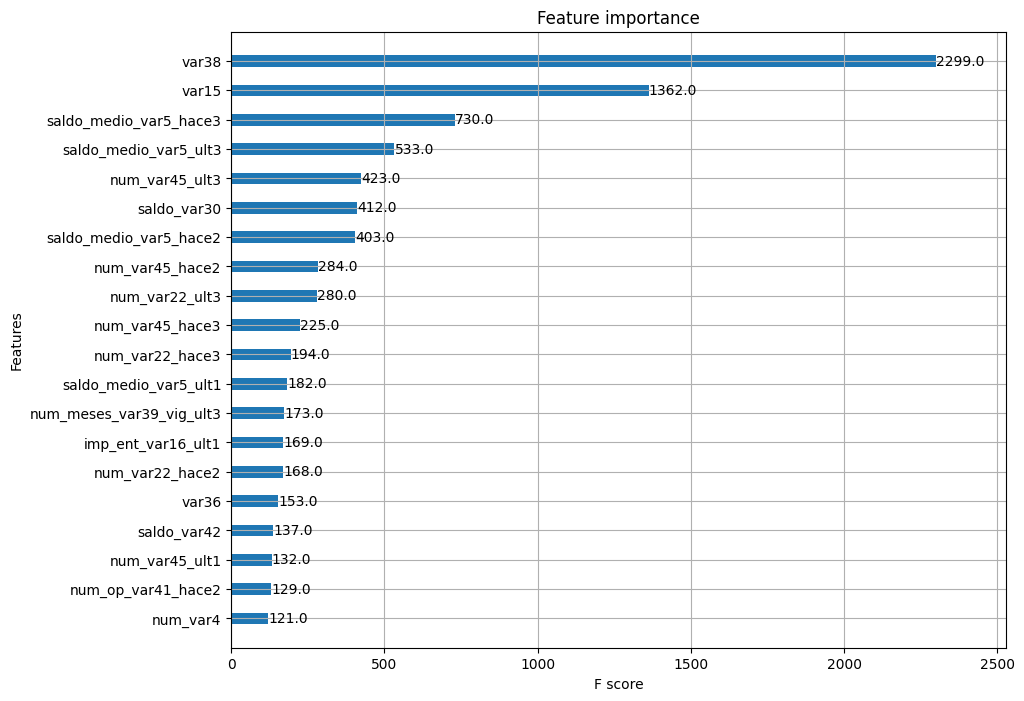

In [15]:
# 피처 중요도
# xgboost 모듈의 plot_importrane() 메서드를 이용
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax , max_num_features=20, height=0.4)

In [16]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# LGBMClassifier 만들기.
lgbm_clf = LGBMClassifier(n_estimators=500)

# eval_set을 설정하여 조기 중단 및 verbose 사용.
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, eval_metric="auc", eval_set=evals)

# ROC AUC 점수 계산
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 215, number of negative: 5154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6672
[LightGBM] [Info] Number of data points in the train set: 5369, number of used features: 181
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040045 -> initscore=-3.176890
[LightGBM] [Info] Start training from score -3.176890
ROC AUC: 0.7911


In [17]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64],
          'max_depth': [128, 160],
          'min_child_samples': [60, 100],
          'subsample': [0.8, 1]}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 조합 검색
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

# 최적의 모델을 사용하여 ROC AUC 계산
best_lgbm_clf = gridcv.best_estimator_
lgbm_roc_score = roc_auc_score(y_test, best_lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

09 캐글 신용카드 사기 검출

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('/content/creditcard.csv')
card_df = card_df.dropna()
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


In [30]:
# get_preprocessed_df() 함수 : 인자로 입력된 데이터 프레임을 복사하고 이를 가공하여 반환
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

In [31]:
# get_train_test_dataset()
# get_preprocessed_df 함수를 호출한 뒤, 학습 피처/레이블 데이터 세트, 테스트 피처/레이블 데이터 세트를 반환

def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [32]:
# 레이블 값 비율을 백분율로 환산하여 잘 분할되었는지 확인
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0.0    99.756165
1.0     0.243835
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0.0    99.758641
1.0     0.241359
Name: Class, dtype: float64


In [33]:
# 3장에서 생성한 함수
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [34]:
# 로지스틱 회귀 분석 방법 사용
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행.
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[23132    14]
 [   25    31]]
정확도: 0.9983, 정밀도: 0.6889, 재현율: 0.5536,    F1: 0.6139, AUC:0.9480


In [35]:
# 인자로 사이킷런의 Estimator객체와 학습.테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [36]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 132, number of negative: 54003
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 54135, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

<Axes: xlabel='Amount', ylabel='Density'>

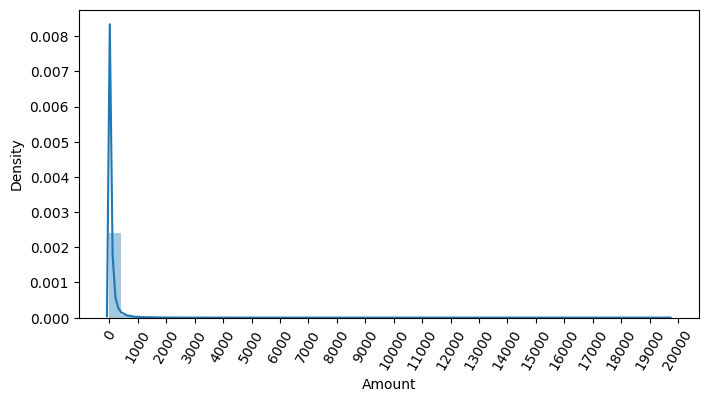

In [37]:
# Amount 피처의 분포도 확인
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [38]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [39]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[23139     7]
 [   22    34]]
정확도: 0.9988, 정밀도: 0.8293, 재현율: 0.6071,    F1: 0.7010, AUC:0.9881
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 132, number of negative: 54003
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 54135, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [40]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [41]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[23139     7]
 [   23    33]]
정확도: 0.9987, 정밀도: 0.8250, 재현율: 0.5893,    F1: 0.6875, AUC:0.9880
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 132, number of negative: 54003
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 54135, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

<Axes: >

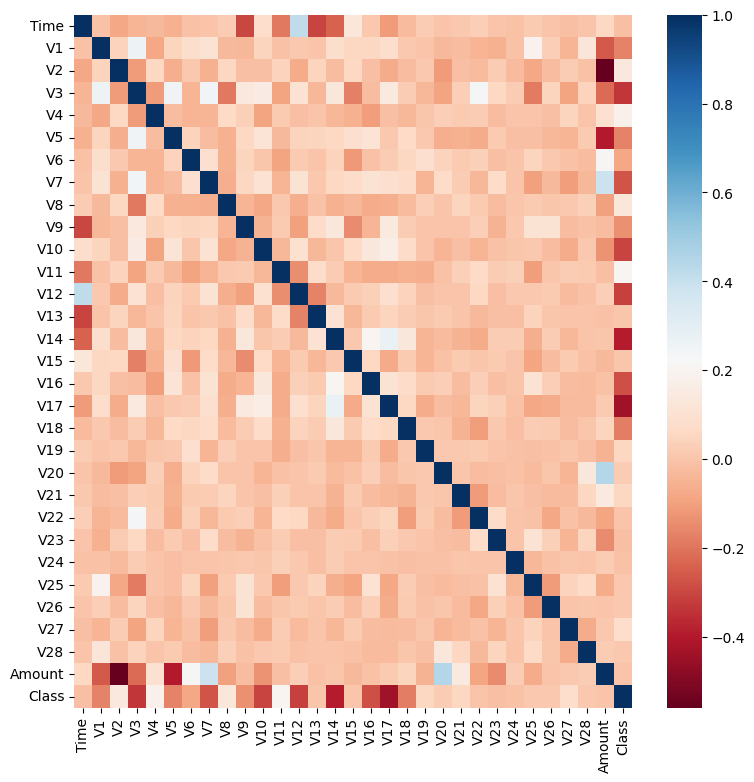

In [42]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [43]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환.
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [44]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([], dtype='int64')


In [45]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                     tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[23139     7]
 [   23    33]]
정확도: 0.9987, 정밀도: 0.8250, 재현율: 0.5893,    F1: 0.6875, AUC:0.9880
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 132, number of negative: 54003
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 54135, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (54135, 29) (54135,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (108006, 29) (108006,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    54003
1.0    54003
Name: Class, dtype: int64


In [47]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[22586   560]
 [    3    53]]
정확도: 0.9757, 정밀도: 0.0865, 재현율: 0.9464,    F1: 0.1584, AUC:0.9801


In [48]:
# 3장 함수
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

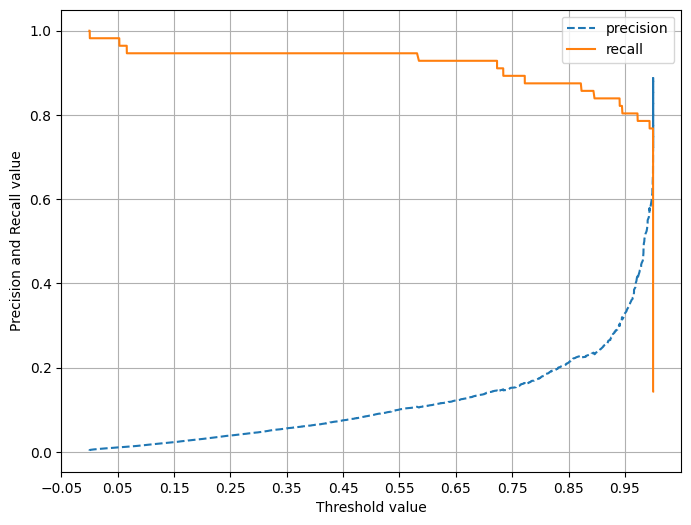

In [49]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [50]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 54003, number of negative: 54003
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 108006, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 